In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# ---------- CONFIG ----------
CSV_PATH = "data/media_ads_30days.csv"  # change if your file name/location differs

DATE_COL = "day"
ID_COLS = ["day_int", "campaign_start_date"]  # kept for reference
# Choose the metrics you want to inspect (add/remove as needed)
METRICS = [
    "impressions", "clicks", "revenue", "media_cost",
    "engagements", "conversions_total",
    "trueview_viewrate", "video_quartile_25_views", "video_quartile_50_views",
    "video_quartile_75_views", "video_completions", "video_starts",
    "trueview_views", "conversions_clickthrough", "conversions_viewthrough"
]

In [4]:
# ---------- LOAD ----------
df = pd.read_csv(CSV_PATH)

In [5]:
df.head()

,day,day_int,campaign_start_date,media_cost,impressions,clicks,revenue,engagements,conversions_total,trueview_viewrate,video_quartile_25_views,video_quartile_75_views,video_quartile_50_views,video_completions,video_starts,trueview_views,conversions_clickthrough,conversions_viewthrough
0,01-08-2025,0,01-08-2025,48577.897621,1046741,2603,50132.39034,48889,0,23.941,591192,392180,435684,368537,0,36710,0,0
1,02-08-2025,1,01-08-2025,56995.187160,1915936,3225,58819.03315,97804,0,24.836,900506,473244,561812,427985,0,71925,0,0
2,03-08-2025,2,01-08-2025,56987.814660,1983594,3953,58811.42474,113017,0,27.300,1087087,628808,729927,574599,0,83187,0,0
3,04-08-2025,3,01-08-2025,55611.644226,1874281,3376,57391.21684,111010,0,29.057,973393,523259,622010,471402,0,81591,0,0
4,05-08-2025,4,01-08-2025,56796.007550,1982844,3697,58613.47979,119930,0,28.478,1021848,536373,643444,480430,0,88369,0,0


In [6]:

# Parse dates
if DATE_COL in df.columns:
    df[DATE_COL] = pd.to_datetime(df[DATE_COL], dayfirst=True, errors="coerce")

if "campaign_start_date" in df.columns:
    df["campaign_start_date"] = pd.to_datetime(df["campaign_start_date"], dayfirst=True, errors="coerce")


In [7]:
# Sort by date
df = df.sort_values(DATE_COL).reset_index(drop=True)

print("=== HEAD ===")
print(df.head(3), "\n")

print("=== INFO ===")
print(df.info(), "\n")

=== HEAD ===
         day  day_int campaign_start_date    media_cost  impressions  clicks  \
0 2025-08-01        0          2025-08-01  48577.897621      1046741    2603   
1 2025-08-02        1          2025-08-01  56995.187160      1915936    3225   
2 2025-08-03        2          2025-08-01  56987.814660      1983594    3953   

       revenue  engagements  conversions_total  trueview_viewrate  \
0  50132.39034        48889                  0             23.941   
1  58819.03315        97804                  0             24.836   
2  58811.42474       113017                  0             27.300   

   video_quartile_25_views  video_quartile_75_views  video_quartile_50_views  \
0                   591192                   392180                   435684   
1                   900506                   473244                   561812   
2                  1087087                   628808                   729927   

   video_completions  video_starts  trueview_views  conversions_clic

In [8]:
# ---------- SANITY CHECKS ----------
print("=== SANITY CHECKS ===")
n_rows = len(df)
date_min, date_max = df[DATE_COL].min(), df[DATE_COL].max()
print(f"Rows: {n_rows}")
print(f"Date range: {date_min.date() if pd.notna(date_min) else date_min} → {date_max.date() if pd.notna(date_max) else date_max}")


=== SANITY CHECKS ===
Rows: 31
Date range: 2025-08-01 → 2025-08-31


In [9]:
# Missing % per column
miss = df.isna().mean().sort_values(ascending=False) * 100.0
print("\n% Missing by column:")
print(miss.to_string())



% Missing by column:
day                         0.0
day_int                     0.0
campaign_start_date         0.0
media_cost                  0.0
impressions                 0.0
clicks                      0.0
revenue                     0.0
engagements                 0.0
conversions_total           0.0
trueview_viewrate           0.0
video_quartile_25_views     0.0
video_quartile_75_views     0.0
video_quartile_50_views     0.0
video_completions           0.0
video_starts                0.0
trueview_views              0.0
conversions_clickthrough    0.0
conversions_viewthrough     0.0


In [10]:
# Duplicate dates?
dup_dates = df.duplicated(subset=[DATE_COL]).sum()
print(f"\nDuplicate {DATE_COL} rows: {dup_dates}")


Duplicate day rows: 0


In [11]:
# Check daily gaps
if df[DATE_COL].notna().all():
    full_index = pd.date_range(df[DATE_COL].min(), df[DATE_COL].max(), freq="D")
    gaps = set(full_index.date) - set(df[DATE_COL].dt.date)
    print(f"Gaps in daily dates: {len(gaps)} {'(none)' if len(gaps)==0 else ''}")
    if len(gaps) > 0:
        # Show up to first 10 gaps
        print("First missing dates:", sorted(list(gaps))[:10])
print()

Gaps in daily dates: 0 (none)



In [12]:
# ---------- BASIC STATS ----------
print("=== BASIC STATS (numeric cols) ===")
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
print(df[num_cols].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T, "\n")

=== BASIC STATS (numeric cols) ===
                          count          mean            std           min  \
day_int                    31.0  1.500000e+01       9.092121       0.00000   
media_cost                 31.0  5.032489e+04    6717.824734   24507.55793   
impressions                31.0  1.499998e+06  276837.754035  798750.00000   
clicks                     31.0  4.321000e+03     882.423972    2180.00000   
revenue                    31.0  5.193529e+04    6932.795125   25291.79979   
engagements                31.0  4.040265e+04   32846.448582   13682.00000   
conversions_total          31.0  0.000000e+00       0.000000       0.00000   
trueview_viewrate          31.0  2.560797e+01       7.388033      18.68200   
video_quartile_25_views    31.0  1.049262e+06  181018.256941  540540.00000   
video_quartile_75_views    31.0  8.472930e+05  224477.514962  392180.00000   
video_quartile_50_views    31.0  8.955934e+05  212550.999732  435684.00000   
video_completions          31

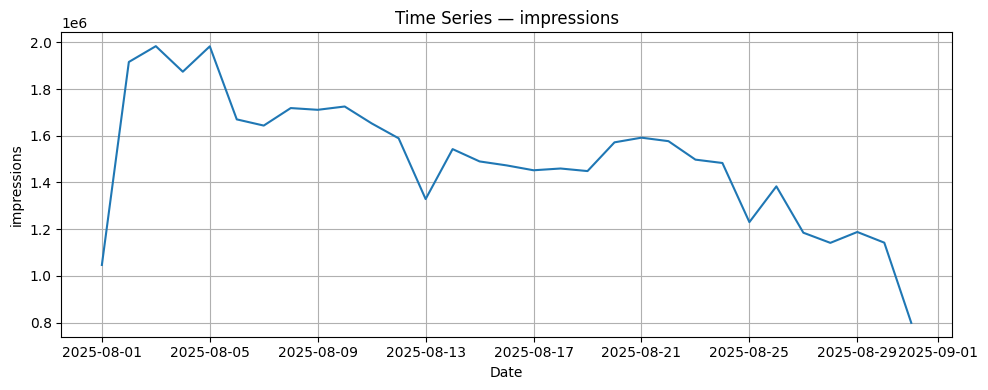

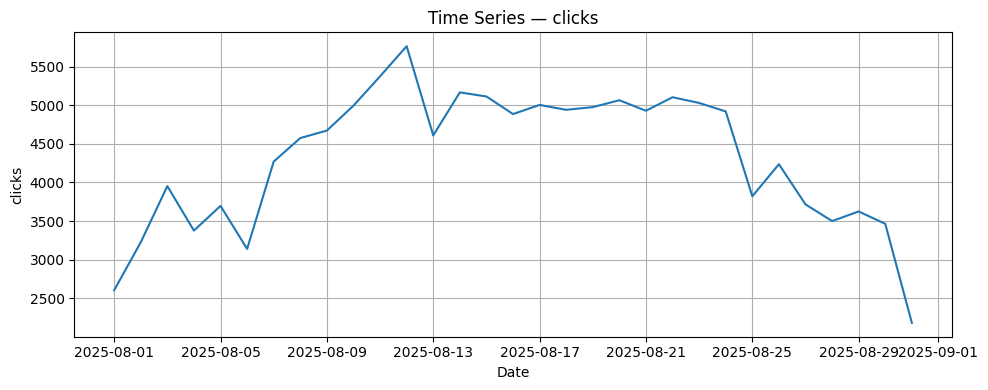

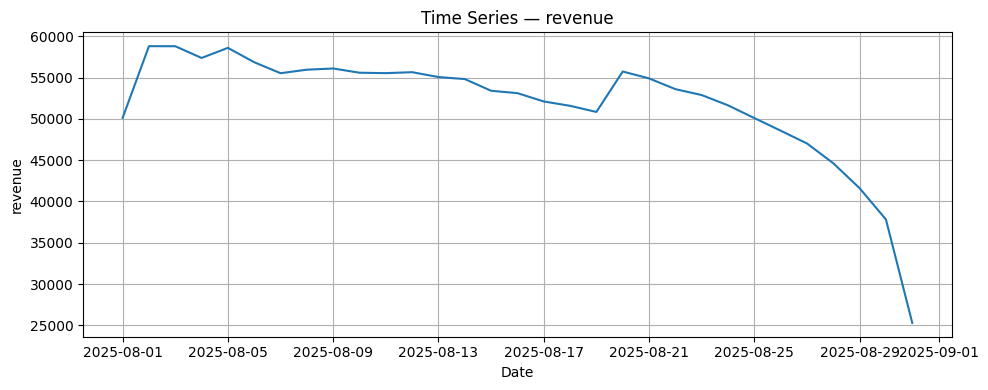

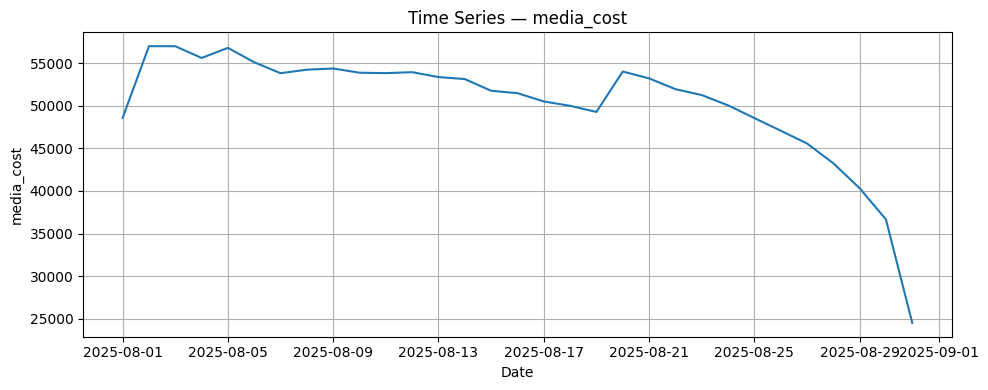

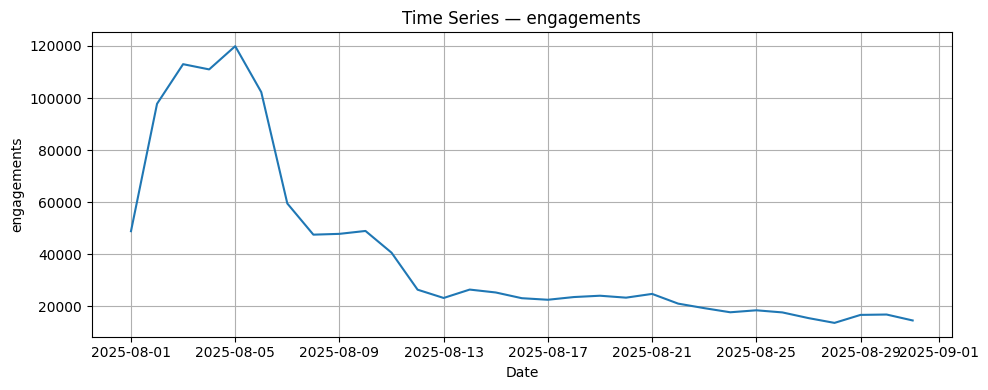

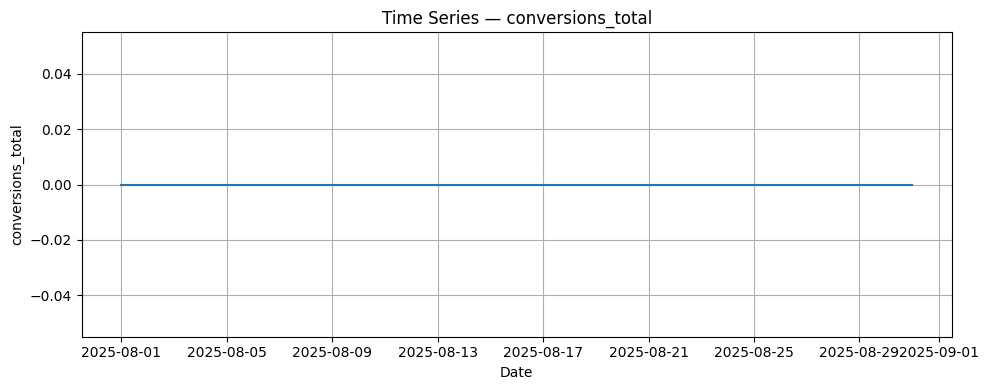

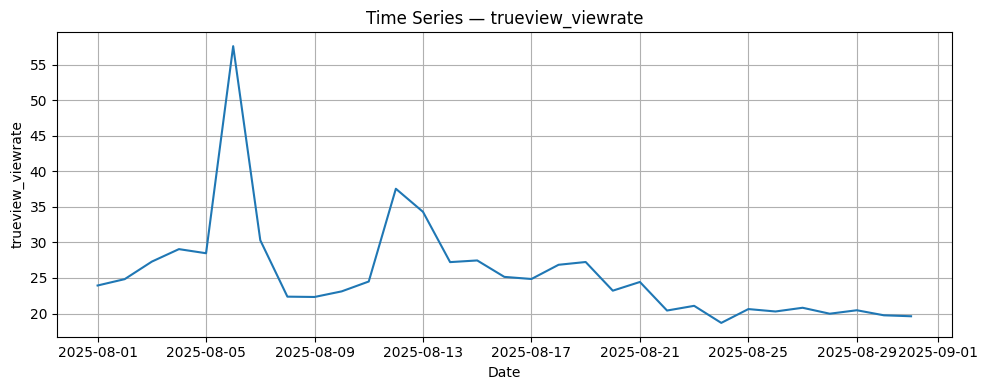

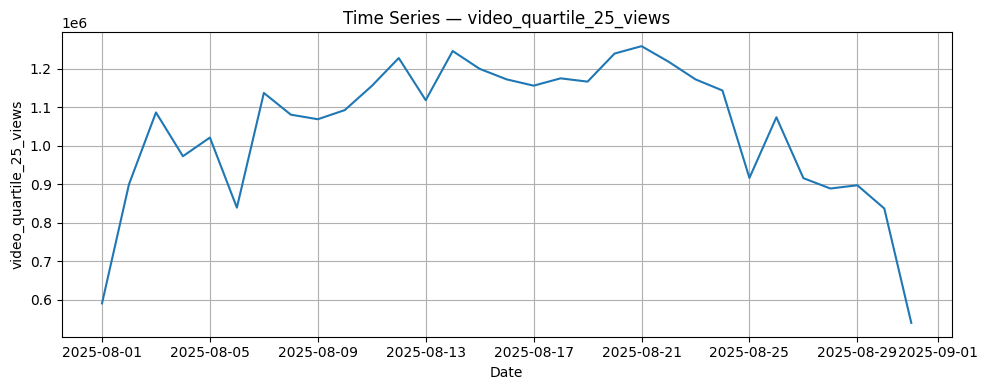

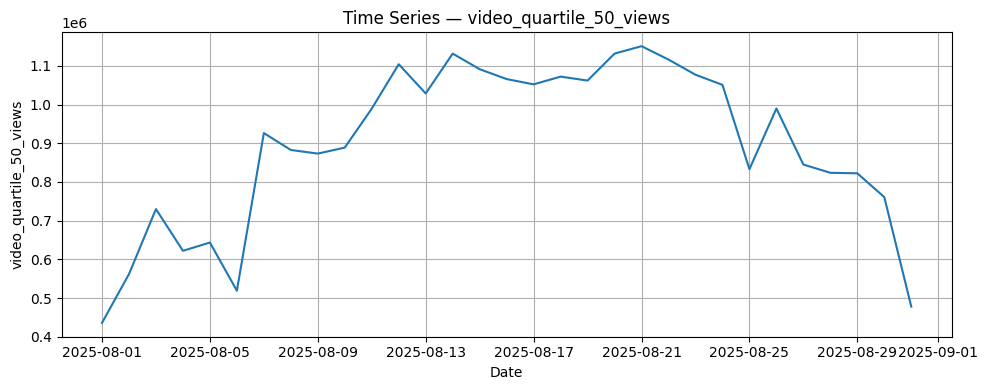

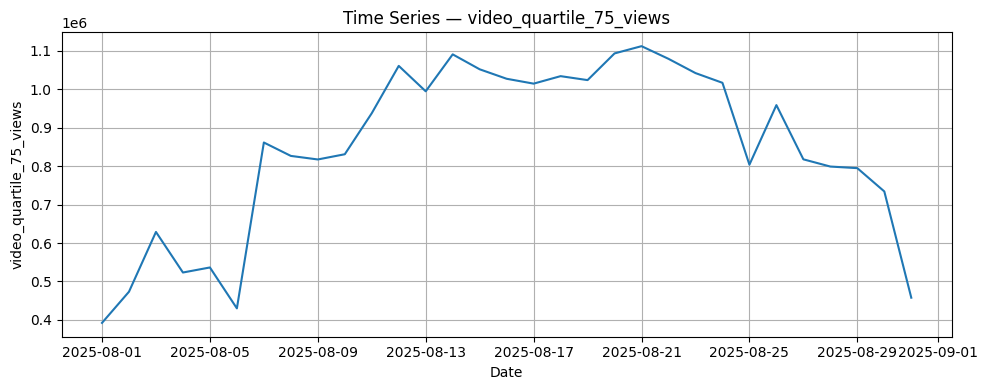

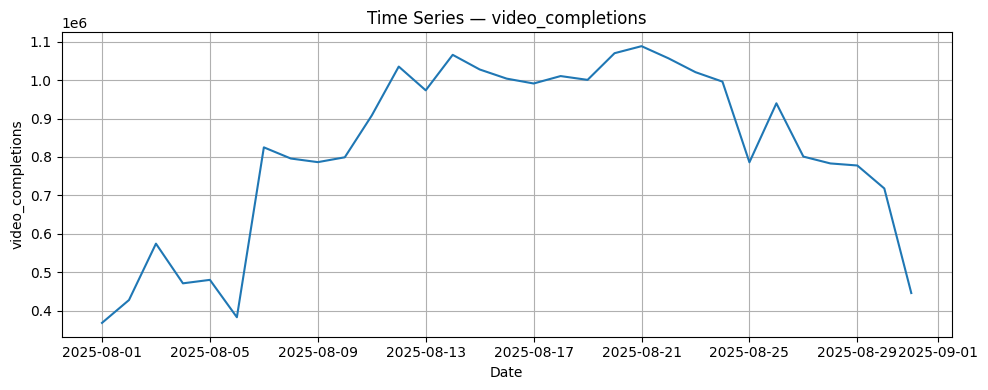

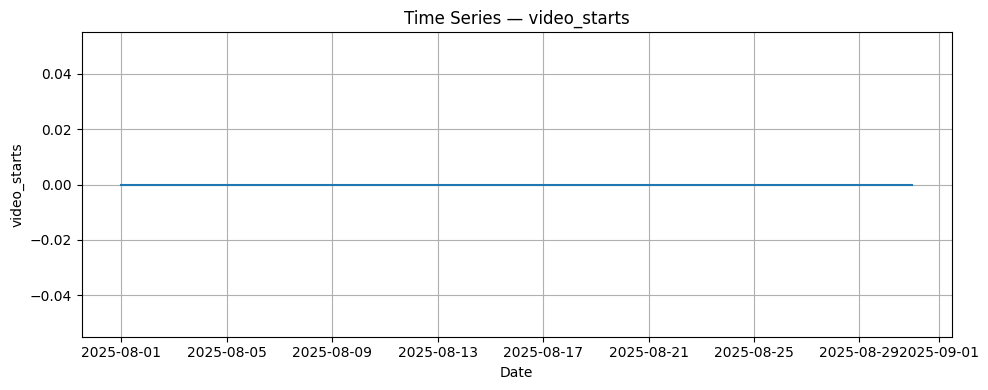

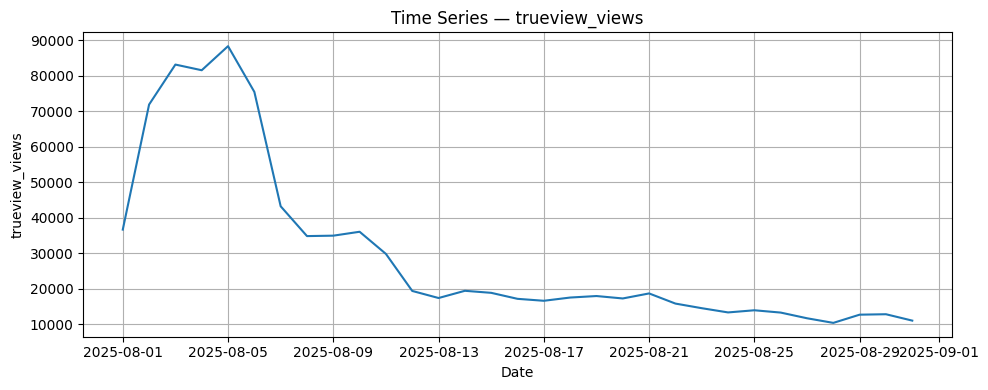

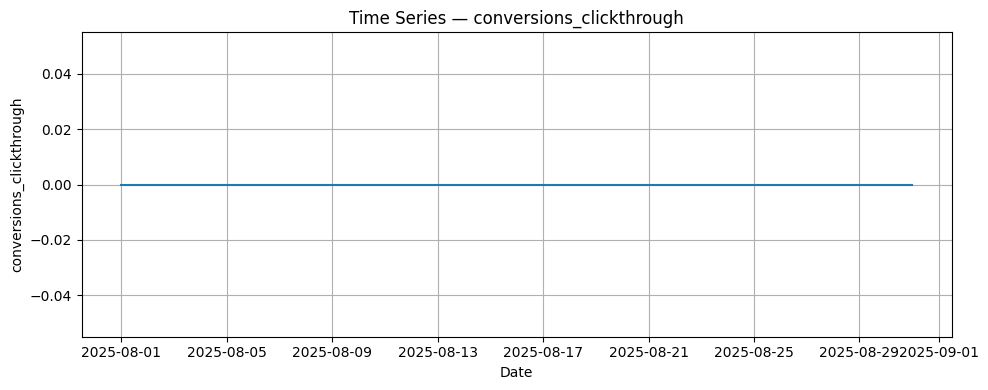

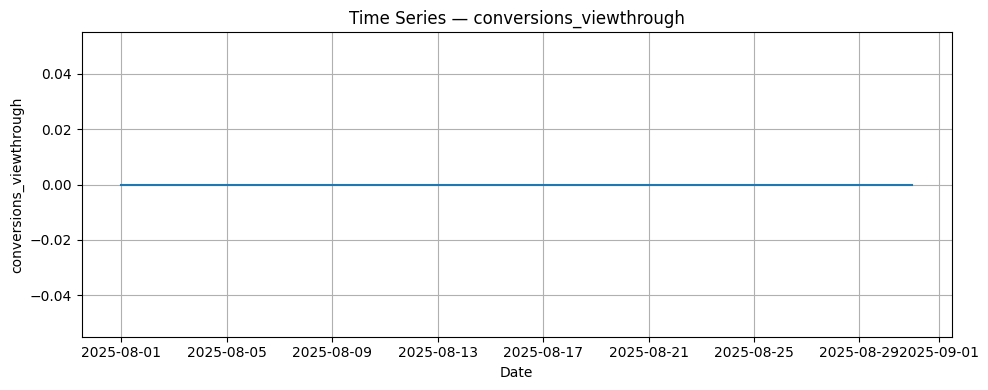

In [13]:
# ---------- TIME SERIES PLOTS ----------
for m in METRICS:
    if m in df.columns:
        plt.figure(figsize=(10,4))
        plt.plot(df[DATE_COL], df[m])
        plt.title(f"Time Series — {m}")
        plt.xlabel("Date")
        plt.ylabel(m)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

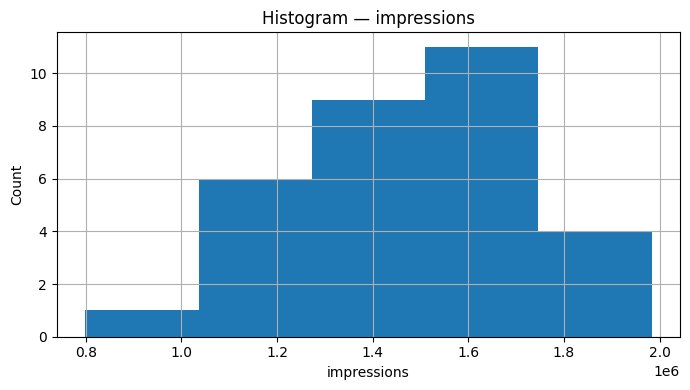

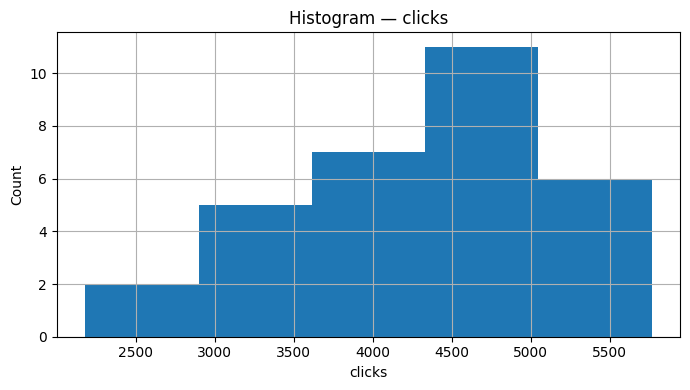

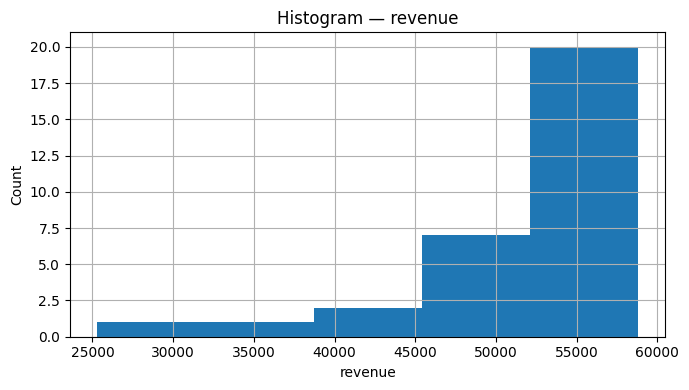

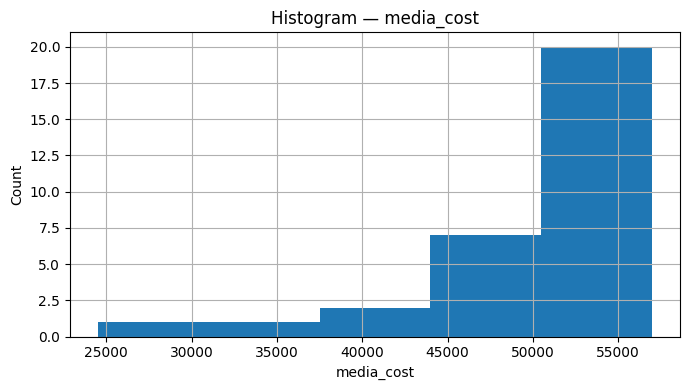

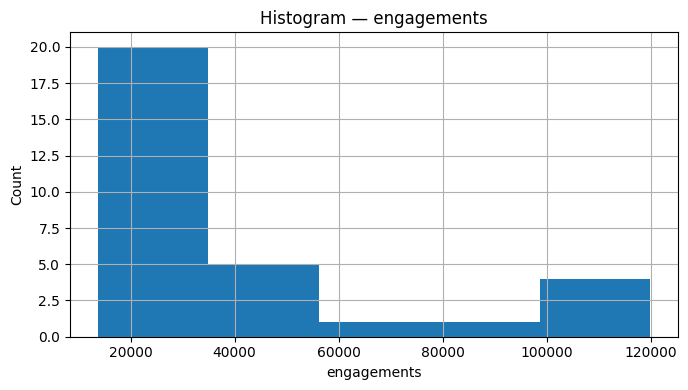

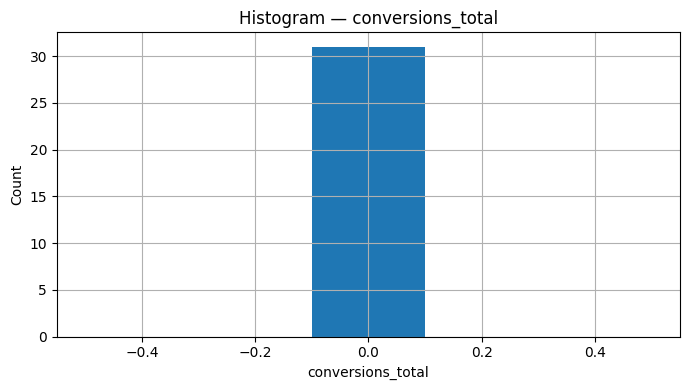

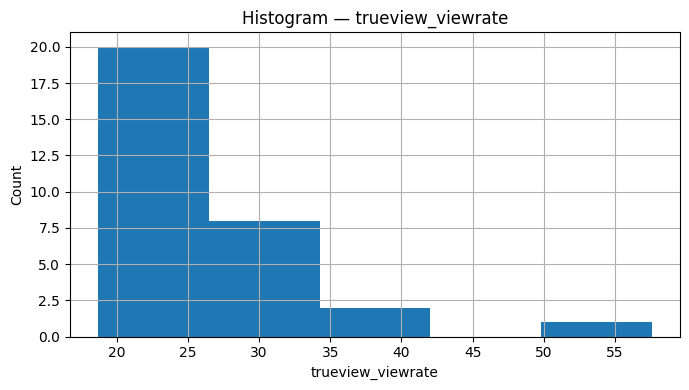

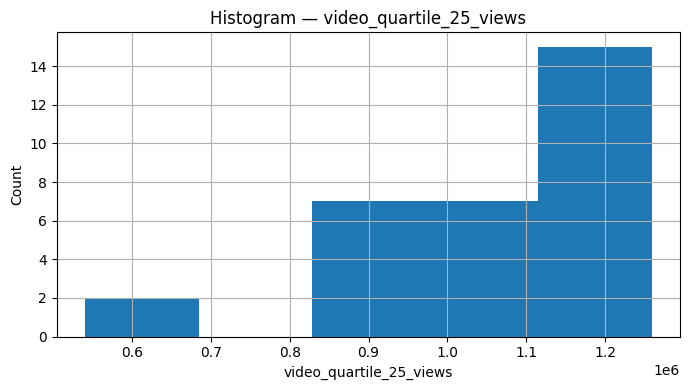

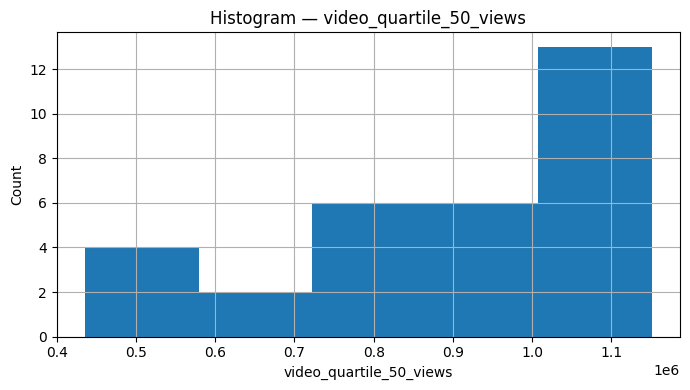

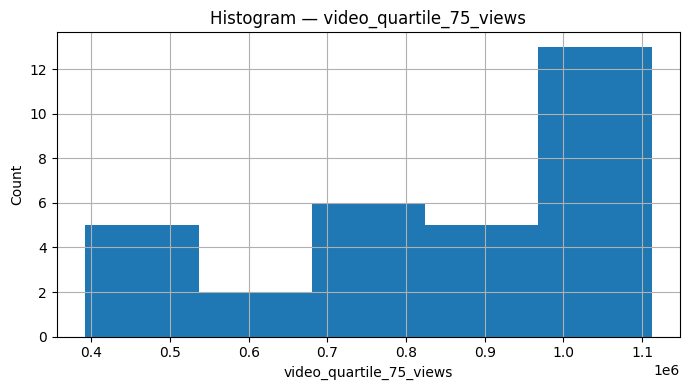

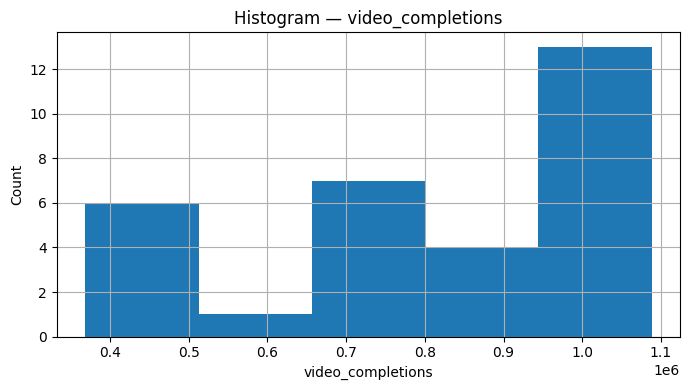

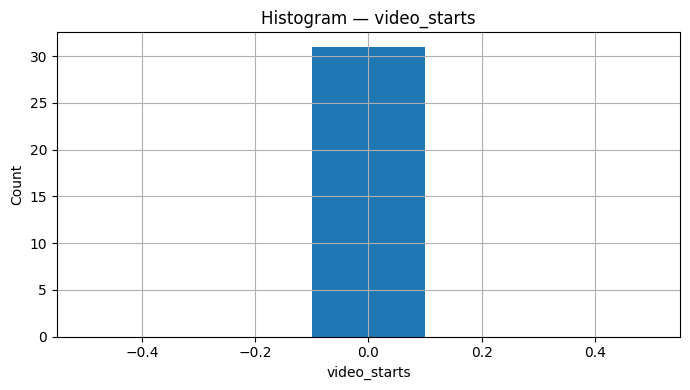

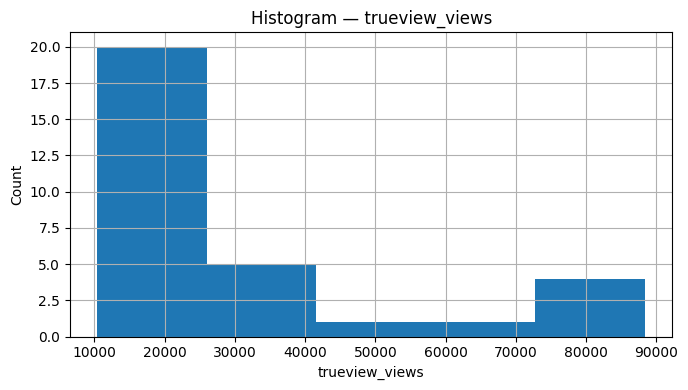

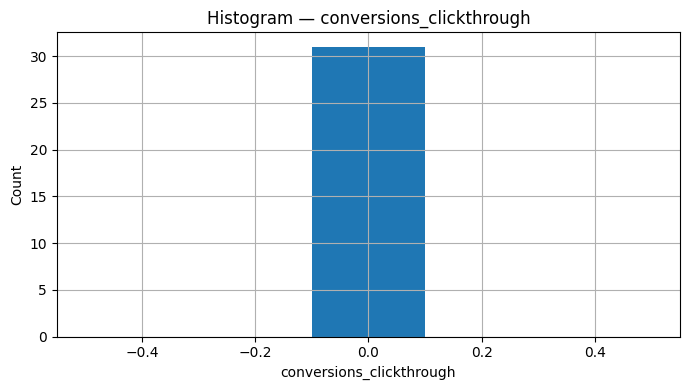

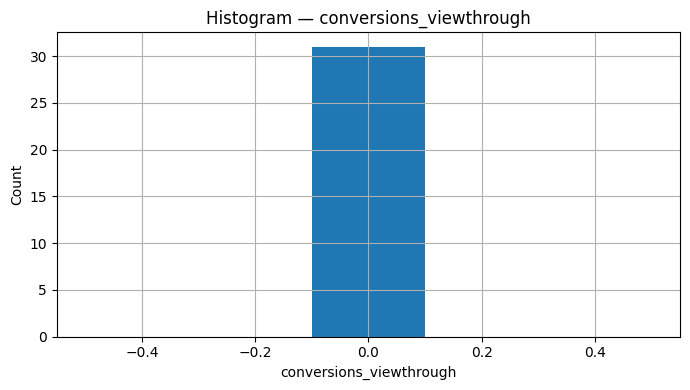

In [14]:
# ---------- HISTOGRAMS ----------
for m in METRICS:
    if m in df.columns and pd.api.types.is_numeric_dtype(df[m]):
        plt.figure(figsize=(7,4))
        vals = df[m].dropna().values
        # choose a reasonable bin count based on data size
        bins = min(20, max(5, int(np.sqrt(len(vals)))))
        plt.hist(vals, bins=bins)
        plt.title(f"Histogram — {m}")
        plt.xlabel(m)
        plt.ylabel("Count")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

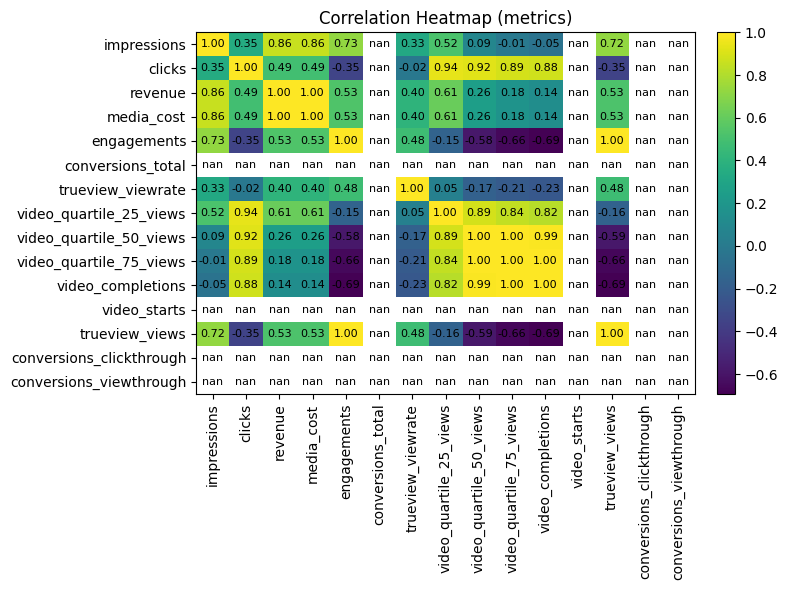

In [15]:
# ---------- CORRELATION HEATMAP ----------
corr_cols = [c for c in METRICS if c in df.columns and pd.api.types.is_numeric_dtype(df[c])]
if len(corr_cols) >= 2:
    corr = df[corr_cols].corr()
    plt.figure(figsize=(8,6))
    im = plt.imshow(corr.values, interpolation='nearest', aspect='auto')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title("Correlation Heatmap (metrics)")
    plt.xticks(ticks=np.arange(len(corr_cols)), labels=corr_cols, rotation=90)
    plt.yticks(ticks=np.arange(len(corr_cols)), labels=corr_cols)
    # add values
    for i in range(len(corr_cols)):
        for j in range(len(corr_cols)):
            val = corr.values[i, j]
            plt.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=8)
    plt.tight_layout()
    plt.show()

In [16]:
# ---------- QUICK NOTES ----------
print("NOTES:")
print("- If histograms show heavy right-skew (e.g., counts, costs), we’ll consider log1p transforms in the NEW pipeline.")
print("- If correlation shows strong ties (e.g., clicks ~ impressions), we’ll include those as exogenous features.")
print("- Next, we’ll reproduce the OLD pipeline features/training exactly, evaluate, and plot; then we’ll run the NEW pipeline and compare.")

NOTES:
- If histograms show heavy right-skew (e.g., counts, costs), we’ll consider log1p transforms in the NEW pipeline.
- If correlation shows strong ties (e.g., clicks ~ impressions), we’ll include those as exogenous features.
- Next, we’ll reproduce the OLD pipeline features/training exactly, evaluate, and plot; then we’ll run the NEW pipeline and compare.


In [17]:
# ---------- HELPER: mape ----------
def mape(y_true, y_pred):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)
    return np.mean(np.abs((y_true - y_pred) / np.clip(y_true, 1e-9, None))) * 100


In [ ]:
# ---------- HELPER: rebuild OLD features (matches your function) ----------
def build_features_old(df, goal_type):
    df = df.copy()

    # aggregate exactly like your function
    agg_cols = ['day', 'day_int', 'campaign_start_date'] + METRICS
    df_daily = (
        df[agg_cols]
        .groupby(['day', 'day_int', 'campaign_start_date'], as_index=False)
        .sum()
        .sort_values('day')
        .reset_index(drop=True)
    )
    for metric in METRICS:
        if metric in df_daily.columns:
            df_daily[metric] = df_daily[metric].astype('float64')

    # target transform (as your function)
    if goal_type in ['clicks', 'media_cost', 'impressions', 'revenue']:
        y = np.log1p(df_daily[goal_type].clip(lower=0))
        y_inverse = lambda v: np.expm1(v)
        y_label = f"log1p({goal_type})"
    else:
        y = df_daily[goal_type]
        y_inverse = lambda v: v
        y_label = goal_type

    # feature engineering (as-is)
    df_daily['day_of_week'] = pd.to_datetime(df_daily['day']).dt.dayofweek
    df_daily['day_of_month'] = pd.to_datetime(df_daily['day']).dt.day
    df_daily['campaign_age'] = (pd.to_datetime(df_daily['day']) - pd.to_datetime(df_daily['campaign_start_date'])).dt.days

    # NOTE: your code has a minor name inconsistency for rolling avg:
    #   created: f'{goal_type}rolling_avg'   (no underscore)
    #   used in features: f'{goal_type}_rolling_avg'  (with underscore)
    # We'll create BOTH to avoid KeyError while keeping behavior.
    df_daily[f'{goal_type}rolling_avg'] = df_daily[goal_type].rolling(window=7, min_periods=1).mean()
    df_daily[f'{goal_type}_rolling_avg'] = df_daily[f'{goal_type}rolling_avg']

    df_daily[f'{goal_type}_lag1'] = df_daily[goal_type].shift(1)
    df_daily[f'{goal_type}_lag7'] = df_daily[goal_type].shift(7)

    df_daily['cost_per_impression'] = df_daily['media_cost'] / (df_daily['impressions'] + 1.0)

    df_daily['day_of_week_sin'] = np.sin(2 * np.pi * df_daily['day_of_week'] / 7)
    df_daily['day_of_week_cos'] = np.cos(2 * np.pi * df_daily['day_of_week'] / 7)
    df_daily['day_of_month_sin'] = np.sin(2 * np.pi * df_daily['day_of_month'] / 31)
    df_daily['day_of_month_cos'] = np.cos(2 * np.pi * df_daily['day_of_month'] / 31)

    # features (as your function)
    features = [
        'day_int', 'campaign_age', 'cost_per_impression',
        f'{goal_type}_rolling_avg', f'{goal_type}_lag1', f'{goal_type}_lag7',
        'day_of_week_sin', 'day_of_week_cos', 'day_of_month_sin', 'day_of_month_cos'
    ]
    if goal_type == 'clicks' and 'impressions' in df_daily.columns:
        features.append('impressions')

    X = df_daily[features].fillna(0.0)
    return df_daily, X, y, y_inverse, features, y_label

In [20]:
import math
from sklearn.metrics import r2_score
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb


In [25]:
# ---------- HELPER: train OLD model to get TEST predictions ----------
def train_and_eval_old(df, goal_type, plot=True):
    df_daily, X, y, y_inverse, features, y_label = build_features_old(df, goal_type)

    # guard (mirrors your function)
    if df_daily[goal_type].nunique() <= 1 or len(df_daily) < 10:
        return None

    # random split (as your function — this may leak time, but we keep it for OLD)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # scaler (as your function)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    # grid (as your function)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0]
    }
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
    gcv = GridSearchCV(xgb_model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    gcv.fit(X_train_scaled, y_train)
    best_model = gcv.best_estimator_

    # predictions on TEST in target space, then inverse to original space
    y_pred_test = y_inverse(best_model.predict(X_test_scaled))
    y_true_test = y_inverse(y_test.values)

    # compute metrics in original space
    mae = mean_absolute_error(y_true_test, y_pred_test)
    rmse = math.sqrt(mean_squared_error(y_true_test, y_pred_test))
    mape_val = mape(y_true_test, y_pred_test)
    r2 = r2_score(y_test, best_model.predict(X_test_scaled))  # r2 in transformed space (for reference)

    # plot ACTUAL vs PRED on chronological order of TEST rows only (no reordering)
    if plot:
        # build series aligned to dates
        test_idx = X_test.index
        train_idx = X_train.index

        plt.figure(figsize=(10,4))
        # Train actual
        plt.plot(df_daily.loc[train_idx, 'day'], y_inverse(y_train.values), label="Train (actual)")
        # Test actual
        plt.plot(df_daily.loc[test_idx, 'day'], y_true_test, label="Test (actual)")
        # Test predictions
        plt.plot(df_daily.loc[test_idx, 'day'], y_pred_test, 'o-', label="OLD pred (test)")
        plt.title(f"OLD pipeline — {goal_type} — Actual vs Predicted")
        plt.xlabel("Date")
        plt.ylabel(goal_type)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Residuals for test
        plt.figure(figsize=(9,3.5))
        res = y_true_test - y_pred_test
        plt.plot(df_daily.loc[test_idx, 'day'], res, 'o-')
        plt.axhline(0, color='k', lw=1)
        plt.title(f"OLD pipeline — Residuals (Test) — {goal_type}")
        plt.xlabel("Date")
        plt.ylabel("Residual")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return {
        "goal": goal_type,
        "mae": mae,
        "rmse": rmse,
        "mape": mape_val,
        "r2_transformed": r2,
        "best_model": best_model
    }

In [26]:
# parse dates
raw = pd.read_csv(CSV_PATH)
raw['day'] = pd.to_datetime(raw['day'], dayfirst=True, errors='coerce')
raw['campaign_start_date'] = pd.to_datetime(raw['campaign_start_date'], dayfirst=True, errors='coerce')
raw = raw.sort_values('day').reset_index(drop=True)

print("Loaded rows:", len(raw), "| Date range:", raw['day'].min().date(), "→", raw['day'].max().date())

# ---------- RUN: call your original function (to see if it errors) ----------
# NOTE: replace "forecast_xgboost" below with your already-defined function.
def try_run_original_forecast(df, duration_days, goal):
    try:
        out = train_and_eval_old(df, duration_days, goal)
        print(f"[OLD function] {goal}: returned shape {getattr(out, 'shape', None)}")
        return out
    except Exception as e:
        print(f"[OLD function] {goal}: ERROR -> {repr(e)}")
        return None

DURATION_DAYS = 31  # example horizon for the old function call

# ---------- LOOP OVER GOALS ----------
results = []
for goal in METRICS:
    # skip columns that are all zeros/constant
    if goal not in raw.columns or raw[goal].nunique() <= 1:
        print(f"Skipping {goal}: not enough variation or missing column.")
        continue

    print("\n==============================")
    print("Processing goal:", goal)
    print("==============================")

    # 1) Run your original forecasting function (future only)
    _ = try_run_original_forecast(raw, DURATION_DAYS, goal)

    # 2) Train & evaluate OLD pipeline on a held-out test (random split, as in your code)
    res = train_and_eval_old(raw, goal, plot=True)
    if res is not None:
        results.append(res)

# ---------- LEADERBOARD (OLD ONLY) ----------
if results:
    leaderboard_old = (
        pd.DataFrame(results)
        .loc[:, ["goal", "mae", "rmse", "mape", "r2_transformed"]]
        .sort_values("rmse")
        .reset_index(drop=True)
    )
    print("\n=== OLD Pipeline Leaderboard (Test set) ===")
    print(leaderboard_old.to_string(index=False))
else:
    print("\nNo results to show (all goals were constant or failed).")

Loaded rows: 31 | Date range: 2025-08-01 → 2025-08-31

Processing goal: impressions
[OLD function] impressions: ERROR -> NameError("name 'PERFORMANCE_METRICS' is not defined")


NameError: name 'PERFORMANCE_METRICS' is not defined